# Data Cleaning

<div style="background-color: rgb(33,150,243); padding: 15px; border-radius: 5px;">
This notebook does the initial exploration of the data and cleans it before moving to EDA and feature engineering.

Dataset information:
1. **Taxi Trip Data**: Historical data detailing individual taxi trips.
- `tpep_pickup_datetime`: The date and time when the meter was engaged.
   - `tpep_dropoff_datetime`: The date and time when the meter was disengaged.
   - `passenger_count`: The number of passengers in the vehicle. This is a driver-entered value.
   - `trip_distance`: The elapsed trip distance in miles reported by the taximeter.
   - `PULocationID`: TLC Taxi Zone in which the taximeter was engaged.
   - `DOLocationID`: TLC Taxi Zone in which the taximeter was disengaged.

2. **Weather Data**: Hourly weather observations corresponding to the same time period as the taxi trip data.
   - `temperature`: Air temperature in °C.
   - `precipitation`: Total precipitation (rain, showers, snow) sum of the preceding hour in mm.
   - `rain`: Only liquid precipitation of the preceding hour including local showers and rain from large-scale systems in mm.
   - `snowfall`: Snowfall amount of the preceding hour in cm.
</div>

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

## Initial Data Exploration

### 1. Zone Data

In [2]:
zone_df = pd.read_csv('../data/raw/taxi_zone_lookup.csv')

In [3]:
zone_df.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [4]:
zone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [5]:
zone_df.describe()

,LocationID
count,265.000000
mean,133.000000
std,76.643112
min,1.000000
25%,67.000000
50%,133.000000
75%,199.000000
max,265.000000


In [6]:
zone_df.duplicated().sum()

0

In [7]:
zone_df.isna().sum()

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64

In [8]:
zone_df.Borough.value_counts(dropna=False)

Borough
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
EWR               1
Unknown           1
NaN               1
Name: count, dtype: int64

In [9]:
zone_df.set_index('LocationID')['Borough'].to_dict()

{1: 'EWR',
 2: 'Queens',
 3: 'Bronx',
 4: 'Manhattan',
 5: 'Staten Island',
 6: 'Staten Island',
 7: 'Queens',
 8: 'Queens',
 9: 'Queens',
 10: 'Queens',
 11: 'Brooklyn',
 12: 'Manhattan',
 13: 'Manhattan',
 14: 'Brooklyn',
 15: 'Queens',
 16: 'Queens',
 17: 'Brooklyn',
 18: 'Bronx',
 19: 'Queens',
 20: 'Bronx',
 21: 'Brooklyn',
 22: 'Brooklyn',
 23: 'Staten Island',
 24: 'Manhattan',
 25: 'Brooklyn',
 26: 'Brooklyn',
 27: 'Queens',
 28: 'Queens',
 29: 'Brooklyn',
 30: 'Queens',
 31: 'Bronx',
 32: 'Bronx',
 33: 'Brooklyn',
 34: 'Brooklyn',
 35: 'Brooklyn',
 36: 'Brooklyn',
 37: 'Brooklyn',
 38: 'Queens',
 39: 'Brooklyn',
 40: 'Brooklyn',
 41: 'Manhattan',
 42: 'Manhattan',
 43: 'Manhattan',
 44: 'Staten Island',
 45: 'Manhattan',
 46: 'Bronx',
 47: 'Bronx',
 48: 'Manhattan',
 49: 'Brooklyn',
 50: 'Manhattan',
 51: 'Bronx',
 52: 'Brooklyn',
 53: 'Queens',
 54: 'Brooklyn',
 55: 'Brooklyn',
 56: 'Queens',
 57: 'Queens',
 58: 'Bronx',
 59: 'Bronx',
 60: 'Bronx',
 61: 'Brooklyn',
 62: 'Broo

<div style="background-color: rgb(120, 150, 180); padding: 15px; border-radius: 5px;">
Note
    - location ID 264 is Unknown, 265 is missing - remove them
</div>

### 2. Taxi Trip Data

In [10]:
trip_df = pd.read_csv('../data/raw/TaxiTrips_BronxOrigin2023.csv')

In [11]:
trip_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID
0,2023-01-01 0:08,2023-01-01 0:41,1.0,25.84,60,265
1,2023-01-01 0:27,2023-01-01 0:32,1.0,1.03,159,168
2,2023-01-01 0:16,2023-01-01 0:16,4.0,0.00,174,174
3,2023-01-01 0:00,2023-01-01 0:26,1.0,0.00,136,233
4,2023-01-01 1:51,2023-01-01 1:52,1.0,0.50,168,247


In [12]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66000 entries, 0 to 65999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   66000 non-null  object 
 1   tpep_dropoff_datetime  66000 non-null  object 
 2   passenger_count        60248 non-null  float64
 3   trip_distance          65962 non-null  float64
 4   PULocationID           66000 non-null  int64  
 5   DOLocationID           66000 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.0+ MB


In [13]:
trip_df.describe()

,passenger_count,trip_distance,PULocationID,DOLocationID
count,60248.000000,65962.000000,66000.000000,66000.000000
mean,1.098427,9.864287,159.144864,145.122455
std,0.496177,295.649172,75.455125,76.317578
min,0.000000,0.000000,3.000000,1.000000
25%,1.000000,0.600000,81.000000,74.000000
50%,1.000000,3.200000,168.000000,159.000000
75%,1.000000,8.100000,235.000000,215.000000
max,11.000000,29349.530000,259.000000,265.000000


In [14]:
trip_df.duplicated().sum()

662

In [15]:
trip_df.isna().sum()

tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          5752
trip_distance              38
PULocationID                0
DOLocationID                0
dtype: int64

<div style="background-color: rgb(120, 150, 180); padding: 15px; border-radius: 5px;">
Note - Almost 10% data missing for passenger count
</div>

In [16]:
trip_df.describe(exclude=['datetime', 'object'])

,passenger_count,trip_distance,PULocationID,DOLocationID
count,60248.000000,65962.000000,66000.000000,66000.000000
mean,1.098427,9.864287,159.144864,145.122455
std,0.496177,295.649172,75.455125,76.317578
min,0.000000,0.000000,3.000000,1.000000
25%,1.000000,0.600000,81.000000,74.000000
50%,1.000000,3.200000,168.000000,159.000000
75%,1.000000,8.100000,235.000000,215.000000
max,11.000000,29349.530000,259.000000,265.000000


<div style="background-color: rgb(120, 150, 180); padding: 15px; border-radius: 5px;">
Note <br>
- rows with location ID 264, 265 need to be removed <br>
- passenger count of 11 (max) and 0 (min) seem wrong <br>
- trip distance of 29349.53 (max) and 0 (min) seem wrong
</div>

#### Understanding `passenger_count`

In [17]:
trip_df.passenger_count.value_counts().sort_index()

passenger_count
0.0       375
1.0     56084
2.0      2412
3.0       675
4.0       430
5.0       146
6.0       117
8.0         2
11.0        7
Name: count, dtype: int64

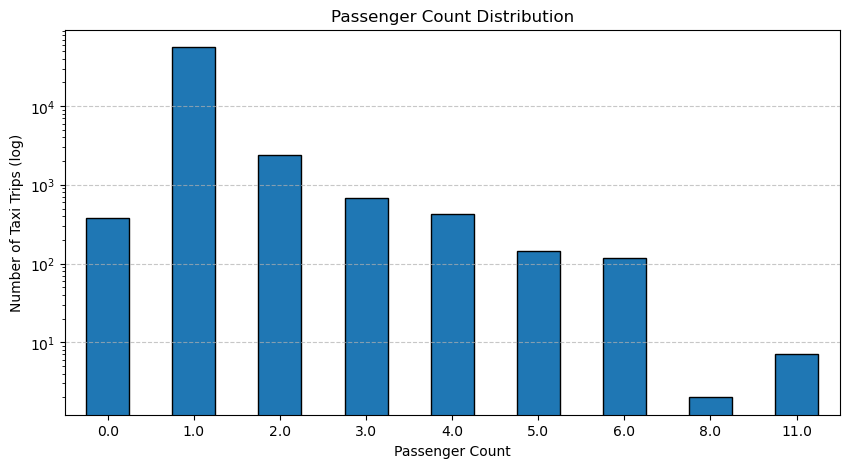

In [18]:
plt.figure(figsize=(10, 5))
trip_df.passenger_count.value_counts().sort_index().plot(kind='bar', edgecolor='black', color='C0')
plt.title('Passenger Count Distribution')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Taxi Trips (log)')
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.savefig('../figures/passenger_count_dist.png', bbox_inches = 'tight')
plt.show()

<div style="background-color: rgb(120, 150, 180); padding: 15px; border-radius: 5px;">
Note - Passenger count = 1 is most prevalent
</div>

#### Understanding `trip_distance`

In [19]:
trip_df.trip_distance.value_counts().sort_index()

trip_distance
0.00        13671
0.01           65
0.02           65
0.03           44
0.04           39
            ...  
23070.70        1
23123.90        1
23210.63        1
26270.00        1
29349.53        1
Name: count, Length: 2129, dtype: int64

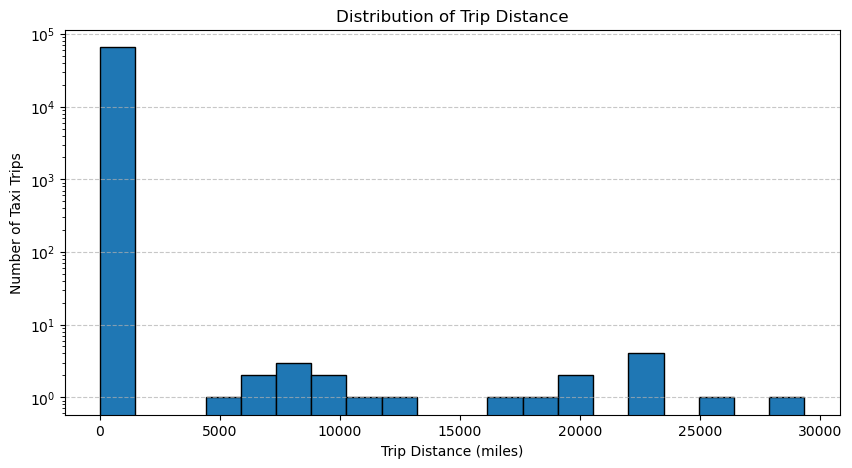

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(trip_df['trip_distance'], bins=20, edgecolor='black', color='C0')
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Number of Taxi Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.savefig('../figures/trip_distance_dist.png', bbox_inches = 'tight')
plt.show()

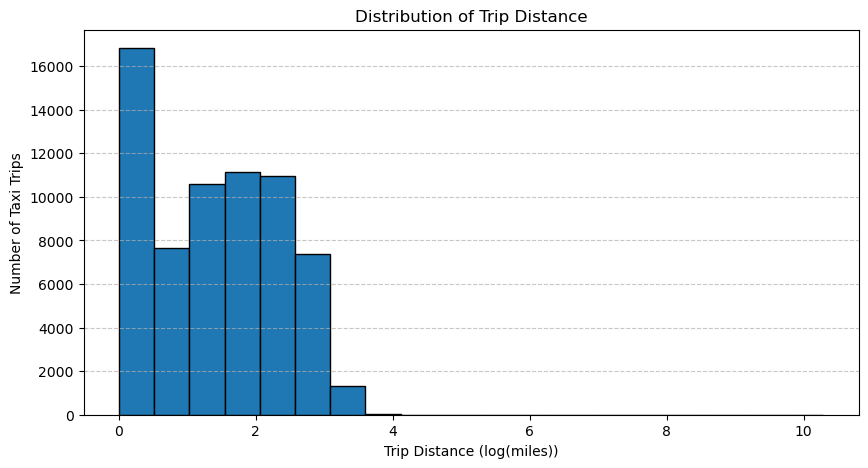

In [21]:
plt.figure(figsize=(10, 5))
plt.hist(np.log(trip_df['trip_distance'] + 1), bins=20, edgecolor='black', color='C0')
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance (log(miles))')
plt.ylabel('Number of Taxi Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../figures/trip_distance_dist2.png', bbox_inches = 'tight')
plt.show()

<div style="background-color: rgb(120, 150, 180); padding: 15px; border-radius: 5px;">
Note - most of the trips are short, meaning the erroneously longer ones are outliers
</div>

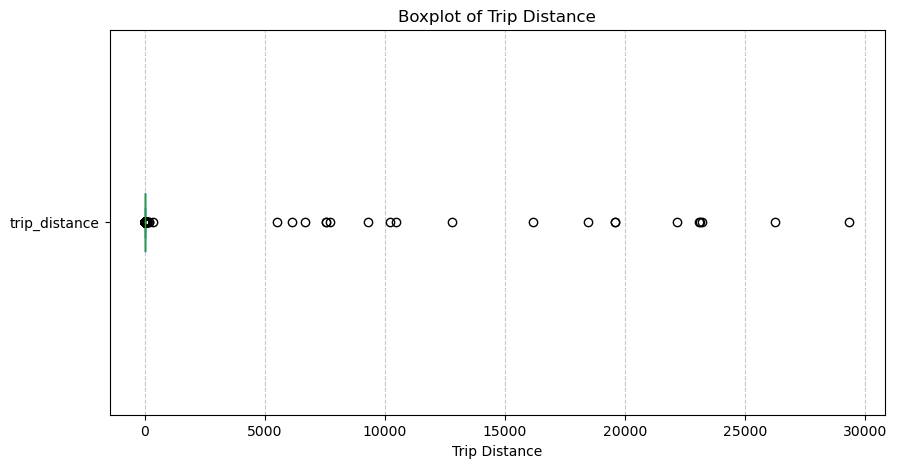

In [22]:
plt.figure(figsize=(10, 5))
trip_df.trip_distance.plot(kind='box', vert=False)
plt.title('Boxplot of Trip Distance')
plt.xlabel('Trip Distance')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('../figures/trip_distance_boxplot.png', bbox_inches = 'tight')
plt.show()

In [23]:
trip_df['trip_distance'].describe(percentiles=[.90, .95, .98, .999])

count    65962.000000
mean         9.864287
std        295.649172
min          0.000000
50%          3.200000
90%         13.700000
95%         17.000000
98%         21.100000
99.9%       34.951950
max      29349.530000
Name: trip_distance, dtype: float64

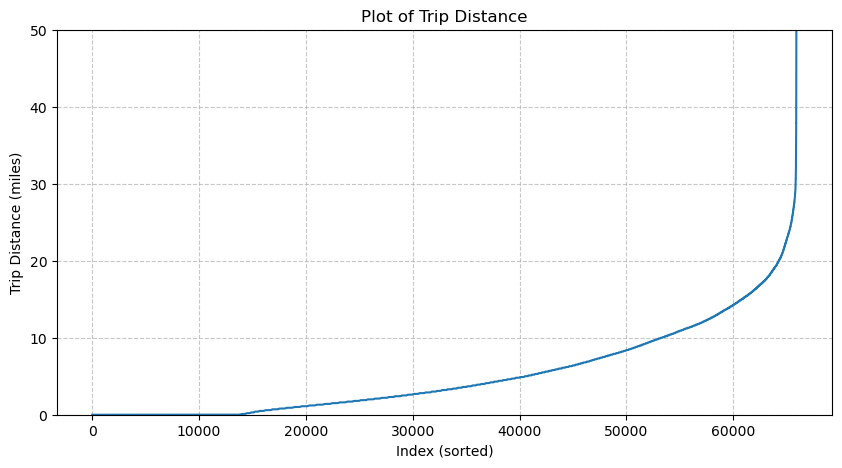

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(np.sort(trip_df.trip_distance), color='C0')
plt.title('Plot of Trip Distance')
plt.xlabel('Index (sorted)')
plt.ylabel('Trip Distance (miles)')
plt.ylim(0, 50)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('../figures/trip_distance_sorted_lineplot.png', bbox_inches = 'tight')
plt.show()

<div style="background-color: rgb(120, 150, 180); padding: 15px; border-radius: 5px;">
Note <br>
- remove passenger count = 8 and = 11 (> 6)<br>
- remove trip distance <= 0 and > 30
</div>

#### Understanding `PULocationID`

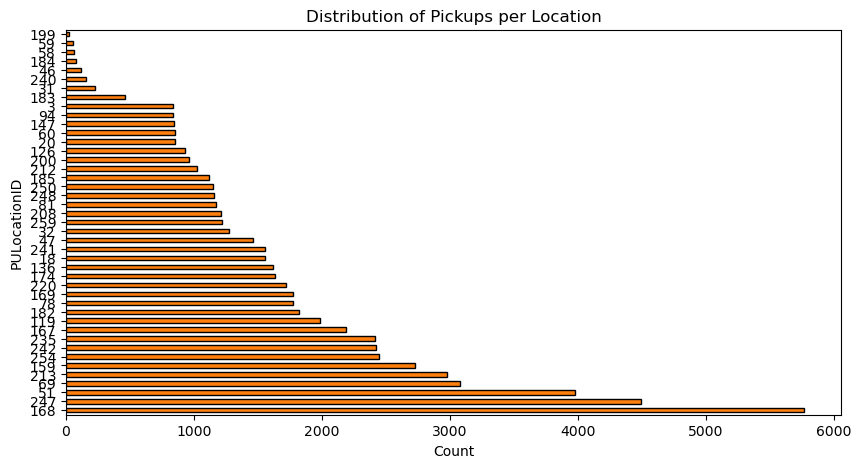

In [25]:
plt.figure(figsize=(10, 5))
trip_df['PULocationID'].value_counts().plot(kind='barh', color='C1', edgecolor='black')
plt.title('Distribution of Pickups per Location')
plt.xlabel('Count')
plt.ylabel('PULocationID')
plt.savefig('../figures/pickup_location_dist.png', bbox_inches = 'tight')
plt.show()

<div style="background-color: rgb(120, 150, 180); padding: 15px; border-radius: 5px;">
Note - LocationID 168 is most popular for pickups
</div>

#### Understanding `DOBoroughID`

In [26]:
trips_zone_df = trip_df.merge(zone_df, left_on='PULocationID', right_on='LocationID', how='left')
trips_zone_df = trips_zone_df.rename(columns={
    'Borough': 'PUBorough', 
    'Zone': 'PUZone', 
    'service_zone': 'PUServiceZone'
}).drop(columns=['LocationID'])
trips_zone_df = trips_zone_df.merge(zone_df, left_on='DOLocationID', right_on='LocationID', how='left')
trips_zone_df = trips_zone_df.rename(columns={
    'Borough': 'DOBorough', 
    'Zone': 'DOZone', 
    'service_zone': 'DOServiceZone'
}).drop(columns=['LocationID'])

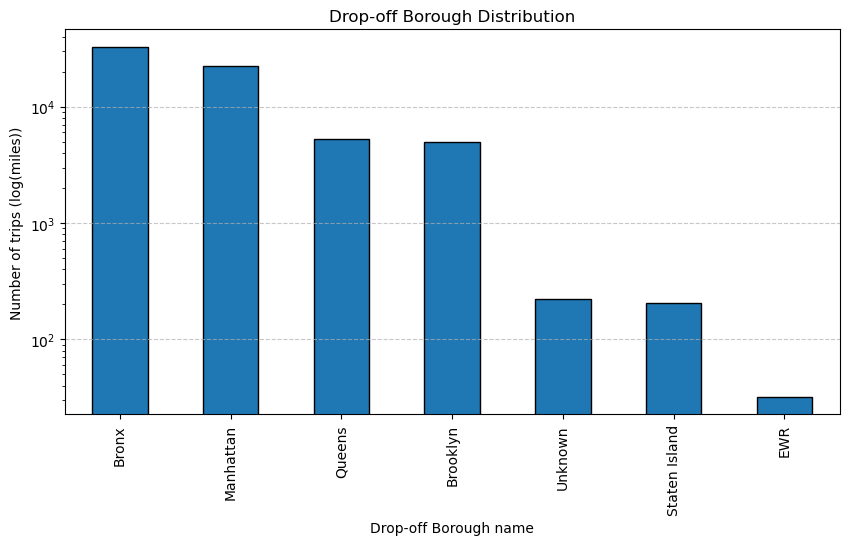

In [27]:
plt.figure(figsize=(10, 5))
trips_zone_df.DOBorough.value_counts().plot(kind='bar', edgecolor='black')
plt.yscale('log')
plt.xlabel('Drop-off Borough name')
plt.ylabel('Number of trips (log(miles))')
plt.title('Drop-off Borough Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../figures/dropoff_location_dist.png', bbox_inches = 'tight')
plt.show()

<div style="background-color: rgb(120, 150, 180); padding: 15px; border-radius: 5px;">
Note - Most of the trips are within Bronx or to Manhattan
</div>

#### Understanding `tpep_pickup_datetime` and `tpep_dropoff_datetime`

In [28]:
pd.to_datetime(trip_df.tpep_pickup_datetime).min()

Timestamp('2023-01-01 00:00:00')

In [29]:
pd.to_datetime(trip_df.tpep_pickup_datetime).max()

Timestamp('2023-12-31 23:56:00')

In [30]:
pd.to_datetime(trip_df.tpep_dropoff_datetime).min()

Timestamp('2023-01-01 00:16:00')

In [31]:
pd.to_datetime(trip_df.tpep_dropoff_datetime).max()

Timestamp('2024-01-01 00:16:00')

<div style="background-color: rgb(120, 150, 180); padding: 15px; border-radius: 5px;">
Note - few drop-off's happenened till beginning of 2024
</div>

### 3. Weather Data

In [32]:
weather_df = pd.read_csv('../data/raw/Bronx_Weather_Data2023.csv', index_col=0)

In [33]:
weather_df.head()

,date,temperature_2m,precipitation,rain,snowfall
0,2023-01-01 00:00:00+00:00,9.743500,0.4,0.4,0.0
1,2023-01-01 01:00:00+00:00,10.593500,1.2,1.2,0.0
2,2023-01-01 02:00:00+00:00,11.143499,0.7,0.7,0.0
3,2023-01-01 03:00:00+00:00,11.043500,2.2,2.2,0.0
4,2023-01-01 04:00:00+00:00,10.843500,1.7,1.7,0.0


In [34]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            8760 non-null   object 
 1   temperature_2m  8760 non-null   float64
 2   precipitation   8760 non-null   float64
 3   rain            8760 non-null   float64
 4   snowfall        8760 non-null   float64
dtypes: float64(4), object(1)
memory usage: 410.6+ KB


In [35]:
weather_df.duplicated().sum()

0

In [36]:
weather_df.isna().sum()

date              0
temperature_2m    0
precipitation     0
rain              0
snowfall          0
dtype: int64

In [37]:
weather_df.describe()

,temperature_2m,precipitation,rain,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.798825,0.174429,0.170126,0.003013
std,8.663837,0.915399,0.911545,0.044494
min,-17.206501,0.000000,0.000000,0.000000
25%,5.643500,0.000000,0.000000,0.000000
50%,12.468500,0.000000,0.000000,0.000000
75%,20.043499,0.000000,0.000000,0.000000
max,33.693500,21.200000,21.200000,1.540000


## Data Cleaning

In [38]:
def clean_zone_data(df):
    """
    Cleans the zone lookup data
    """
    df = df.copy()
    df = df.dropna()
    return df

In [39]:
def clean_weather_data(df):
    """
    Cleans the weather data
    """
    df = df.copy()
    df.date = pd.to_datetime(weather_df.date).dt.tz_convert(None)
    return df

In [40]:
def clean_trip_data(df, zones):
    """
    Cleans the taxi trip data
    """
    df = df.copy()
    df = df.drop_duplicates()
    df = df[df['PULocationID'].isin(zones)].copy()
    df['passenger_count'] = df['passenger_count'].clip(lower=1, upper=6)
    df['trip_distance'] = df['trip_distance'].clip(lower=0, upper=30)
    return df

In [41]:
def clean_trip_data_dropna(df, zones):
    """
    Cleans the taxi trip data with dropping na, 0 passengers and 0 trip distance
    """
    df = df.copy()
    df = df.drop_duplicates()
    df = df[df['PULocationID'].isin(zones)].copy()
    df = df.dropna()
    df = df[df.passenger_count != 0]
    df = df[df.trip_distance != 0]
    return df

#### 1. Zone Data

In [42]:
zone_df = pd.read_csv('../data/raw/taxi_zone_lookup.csv')

In [43]:
# removing locationID 264 and 265
zone_df = clean_zone_data(zone_df)

In [44]:
zone_df.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [45]:
zone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 262
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    263 non-null    int64 
 1   Borough       263 non-null    object
 2   Zone          263 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.3+ KB


In [46]:
# getting location IDs for Bronx
bronx_zones = zone_df[zone_df['Borough'] == 'Bronx']['LocationID']

#### 2. Weather Data

In [47]:
weather_df = pd.read_csv('../data/raw/Bronx_Weather_Data2023.csv', parse_dates=['date'], index_col=0)

In [48]:
# remove utc format
weather_df = clean_weather_data(weather_df)

In [49]:
weather_df.head()

,date,temperature_2m,precipitation,rain,snowfall
0,2023-01-01 00:00:00,9.743500,0.4,0.4,0.0
1,2023-01-01 01:00:00,10.593500,1.2,1.2,0.0
2,2023-01-01 02:00:00,11.143499,0.7,0.7,0.0
3,2023-01-01 03:00:00,11.043500,2.2,2.2,0.0
4,2023-01-01 04:00:00,10.843500,1.7,1.7,0.0


In [50]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            8760 non-null   datetime64[ns]
 1   temperature_2m  8760 non-null   float64       
 2   precipitation   8760 non-null   float64       
 3   rain            8760 non-null   float64       
 4   snowfall        8760 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 410.6 KB


#### 3. Taxi Trip Data

In [51]:
trip_df = pd.read_csv('../data/raw/TaxiTrips_BronxOrigin2023.csv',
                      parse_dates=['tpep_pickup_datetime',
                                   'tpep_dropoff_datetime'])

In [52]:
trip_df1 = clean_trip_data(trip_df, bronx_zones)

In [53]:
trip_df2 = clean_trip_data_dropna(trip_df, bronx_zones)

In [54]:
trip_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65338 entries, 0 to 65999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   65338 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  65338 non-null  datetime64[ns]
 2   passenger_count        59586 non-null  float64       
 3   trip_distance          65300 non-null  float64       
 4   PULocationID           65338 non-null  int64         
 5   DOLocationID           65338 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 3.5 MB


In [55]:
trip_df1.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID
count,65338,65338,59586.000000,65300.000000,65338.000000,65338.000000
mean,2023-07-14 06:08:39.728488704,2023-07-14 06:39:30.737396480,1.101584,5.265004,159.112216,144.976843
min,2023-01-01 00:00:00,2023-01-01 00:16:00,1.000000,0.000000,3.000000,1.000000
25%,2023-04-14 22:27:30,2023-04-14 22:48:00,1.000000,0.630000,81.000000,74.000000
50%,2023-07-20 14:43:00,2023-07-20 15:22:30,1.000000,3.250000,168.000000,159.000000
75%,2023-10-14 11:47:00,2023-10-14 12:11:00,1.000000,8.200000,235.000000,215.000000
max,2023-12-31 23:56:00,2024-01-01 00:16:00,6.000000,30.000000,259.000000,265.000000
std,NaN,NaN,0.474226,5.778058,75.532920,76.350241


In [56]:
trip_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47980 entries, 0 to 64690
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   47980 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  47980 non-null  datetime64[ns]
 2   passenger_count        47980 non-null  float64       
 3   trip_distance          47980 non-null  float64       
 4   PULocationID           47980 non-null  int64         
 5   DOLocationID           47980 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 2.6 MB


In [57]:
trip_df2.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID
count,47980,47980,47980.000000,47980.000000,47980.000000,47980.000000
mean,2023-07-15 06:01:22.448103168,2023-07-15 06:34:36.376406784,1.095727,10.781878,158.968612,143.811380
min,2023-01-01 00:08:00,2023-01-01 00:32:00,1.000000,0.010000,3.000000,1.000000
25%,2023-04-18 09:15:45,2023-04-18 09:52:15,1.000000,2.040000,78.000000,74.000000
50%,2023-07-23 11:57:00,2023-07-23 12:11:00,1.000000,4.700000,169.000000,151.000000
75%,2023-10-14 02:22:15,2023-10-14 02:44:15,1.000000,9.700000,235.000000,216.000000
max,2023-12-31 23:53:00,2023-12-31 23:59:00,11.000000,26270.000000,259.000000,265.000000
std,NaN,NaN,0.469396,282.061310,76.672343,77.174972


## Exporting Clean Data

In [58]:
trip_df1.to_csv('../data/clean/clean_trip_data_keep_all.csv', index=False)

In [59]:
trip_df2.to_csv('../data/clean/clean_trip_data_dropna.csv', index=False)

In [60]:
zone_df.to_csv('../data/clean/clean_zone_data.csv', index=False)

In [61]:
weather_df.to_csv('../data/clean/clean_weather_data.csv', index=False)